<a href="https://colab.research.google.com/github/DaniilAszn/Math_modeling_2_course/blob/main/MMAP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1**

В соответствии с практикой 1 реализовать дикретизацию интегрального уравнения Фредгольма 2-го рода с вырожденным ядром на отрезке с произвольным количеством точек коллокации N:

$$u(x) + \int \limits_{0}^{1} xy \cdot u(y) dy = x$$

Решение описано ранее

# **Задание 2**

Реализовать на любом языке программирования итерационный метод градиентного спуска и протестировать его на решении практики 1

Вывод формулы градиентного спуска:


СЛАУ:
$$Au = f: \sum_{m=1}^{N}a_{nm}u_m = f_n, n=1,N$$


$$\hat A - сопр.опер.$$


Вектор невязки:
$$r = Au - f$$


Функция для минимизации градиентным спуском:
$$F_n(u) = \frac{1}{2} (\sum_{m=1}^{N}a_{nm}u_m - f_n)^2$$


$$F(u) = \sum_{n=1}^{N}F_n(u)$$


Extr $F(u):$
$$\frac{\partial F(u)}{\partial u_k} = 0, k=1,N$$


$$\frac{\partial F_n(u)}{\partial u_k} = \frac{1}{2} \cdot 2 \cdot (\sum a_{nm}u_m - f_n) \cdot a_{nk} = r_n \cdot a_{nk}$$


$$\frac{\partial F(u)}{\partial u_k} = \sum_{n=1}^{N}r_n \cdot a_{nk} = 0$$


$$r_n = \sum a_{nm}u_m - f_n = 0$$


Градиент функции:
$$[\nabla F(u)]_k = \sum_{n=1}^{N}a_{nk} \cdot r_k$$


$$g(u) = A^T \cdot r(u), r(u) = Au - f$$


Задача минимизации:
$$F(u + hg) \rightarrow min$$


$$F(u) = \frac{1}{2}<Au - f,Au - f>$$


$$F(u + hg) = \frac{1}{2}<Au + Ahg - f,Au + Ahg - f>$$


Итерации градиентного спуска:
$$u_{k+1} = u_k +hg, h - l.r.$$


$$\frac{dF(u + hg)}{dh} = 0$$


$$<Ag, Ahg + r> = 0$$


$$h \cdot <Ag, Ag> + <Ag, r> = 0$$


$$h = -\frac{<Ag, r>}{<Ag, Ag>}$$


Итоговый вид формулы градиентного спуска:
$$u_{k+1} = u_k - \frac{<Ag, r>}{<Ag, Ag>} \cdot g$$


$$u_{k+1} = u_k - \frac{<AA^Tr, r>}{<AA^Tr, AA^Tr>} \cdot A^Tr$$


$$u_{k+1} = u_k - \frac{<A^Tr, A^Tr>}{\lVert AA^Tr \rVert ^2} \cdot A^Tr$$


$$u_{k+1} = u_k - \frac{\lVert A^Tr \rVert ^2}{\lVert AA^Tr \rVert ^2} \cdot A^Tr, r=r_k=Au_k - f$$

Метод градиентного спуска:
1. $u_0 = \overrightarrow 0$
2. $u_{k+1} = u_k - \frac{{\lVert A^Tr \rVert}^2}{{\lVert AA^Tr \rVert}^2} \cdot A^Tr$
3. $\frac{\lVert u_k - u_{k-1} \rVert}{\lVert f \rVert} < \varepsilon$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [ ]:
N = int(input("Введите значение N: "))
a, b = 0, 1
h = (b - a) / N

Введите значение N: 6


In [ ]:
def x(i):
    return i * h + h / 2 + a


def y(j):
    return j * h + h / 2 + a


def A_elements(i, j):
    return (x(i) * y(j) * h) + 1 * (i == j)


def f_elements(i, j):
    return x(i)

In [ ]:
rows, cols = N, N

A = np.fromfunction(A_elements, (rows, cols))

In [ ]:
rows, cols = N, 1

f = np.fromfunction(f_elements, (rows, cols))

In [ ]:
# Начальное значение вектора u
u_old = np.array([[0.]] * N)

# Критерий останова
eps = 1e-10

In [ ]:
def gradient_descent(u_old, A, f, r, eps):
    steps = 1

    AT = np.matrix.transpose(A) # не обязательно
    AT_r = AT @ r
    up = np.linalg.norm(AT_r) ** 2
    down = np.linalg.norm(A @ AT_r) ** 2

    u_new = u_old - (up / down) * (AT @ r)

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new
            r = A @ u_old - f
            AT_r = AT @ r
            up = round(np.linalg.norm(AT_r) ** 2, 30)
            down = round(np.linalg.norm(A @ AT_r) ** 2, 30)

            if down != 0:
                u_new = u_old - (up / down) * (AT @ r)

                norm_diff_u = np.linalg.norm(u_new - u_old)
            else:
                break
    else:
        pass


    return u_new, steps

# Для градиентного спуска
r = A @ u_old - f

u_GD, count_steps_GD = gradient_descent(u_old, A, f, r, eps)

In [ ]:
def error(Arr_num, Arr_ana):
    return np.sqrt(np.sum((Arr_ana - Arr_num) ** 2) / np.sum(Arr_ana ** 2))


def u_ana(x):
    return (3 / 4) * x


x_values = [x(i) for i in range(N)]
u_ana_values = np.array([u_ana(i) for i in x_values]).reshape(N, 1)

In [ ]:
print(f"delta_GD = {error(u_GD, u_ana_values)}")
print(f"Число шагов: {count_steps_GD}")

delta_GD = 0.0017391304347823752
Число шагов: 2


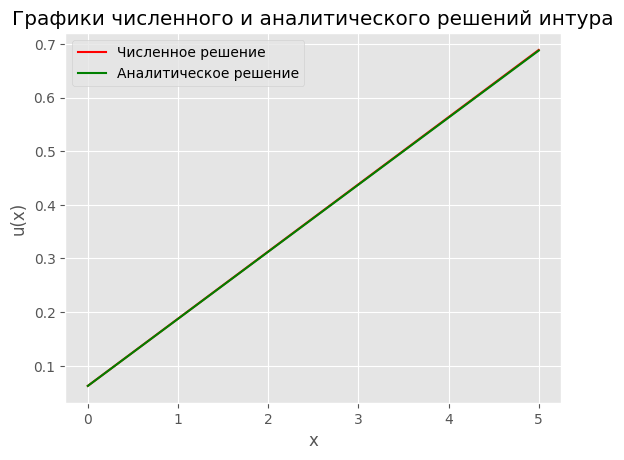

In [ ]:
plt.plot(u_GD, c='red', label='Численное решение')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

# **Задание 3**

При одинаковых значениях $\varepsilon$ сравнить эффективность и качество сходимости итерационных методов: метода простой итерации и градиентного спуска.

In [ ]:
def simple_iteration(u_old, B, f, eps):
    steps = 1

    u_new = B @ u_old + f

    norm_diff_u = np.linalg.norm(u_new - u_old)
    norm_f = np.linalg.norm(f)

    if (norm_diff_u / norm_f) >= eps:
        while (norm_diff_u / norm_f) >= eps:
            steps += 1

            u_old = u_new

            u_new = B @ u_old + f

            norm_diff_u = np.linalg.norm(u_new - u_old)
            # norm_f = np.linalg.norm(f)
    else:
        pass

    return u_new, steps

# Для МПИ
E = np.eye(N)
B = E - A

u_MSI, count_steps_MSI = simple_iteration(u_old, B, f, eps)

In [ ]:
print(f"delta_MSI = {error(u_MSI, u_ana_values)}")
print(f"Число шагов: {count_steps_MSI}")

delta_MSI = 0.0017391304073981141
Число шагов: 22


In [ ]:
Methods_table = {'GD': (error(u_GD, u_ana_values), count_steps_GD),
                 'MSI': (error(u_MSI, u_ana_values), count_steps_MSI)}

print(Methods_table)

Methods_df = pd.DataFrame.from_dict(Methods_table)
print(Methods_df)

{'GD': (0.0017391304347823752, 2), 'MSI': (0.0017391304073981141, 22)}
         GD        MSI
0  0.001739   0.001739
1  2.000000  22.000000


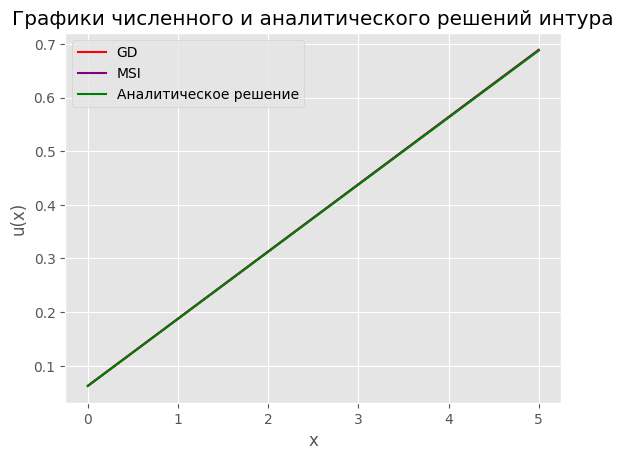

In [ ]:
plt.plot(u_GD, c='red', label='GD')
plt.plot(u_MSI, c='purple', label='MSI')
plt.plot(u_ana_values, c='green', label='Аналитическое решение')
plt.title('Графики численного и аналитического решений интура')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()